In [1]:
#!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
#from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




# import files

In [3]:
### import and read csv file

path = 'Output/full_indicators_by_country_by_year.csv'
df = pd.read_csv(path)


df

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,20.0,3.294,7.758981
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,20.0,3.294,7.651162
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,20.0,3.294,9.694882
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,20.0,3.294,9.688910
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,20.0,3.294,10.275749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,...,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,24.0,2.396,3.666993
1659,1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,...,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,24.0,2.396,2.157548
1660,1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,...,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,24.0,2.396,3.196767
1661,1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,...,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,24.0,2.396,3.827232


## Inspect the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 53 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   index                                                                                                 1663 non-null   int64  
 1   country                                                                                               1663 non-null   object 
 2   iso3Code                                                                                              1663 non-null   object 
 3   year                                                                                                  1663 non-null   int64  
 4   clean fuels for cooking (% of population)                                                             

In [5]:
df.describe()

,index,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,...,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,831.000000,2019.034275,65.258328,83.683824,38.149248,1.140878,1080.260313,19.438815,23.912632,315.239622,...,5.118244,3.461613,9.987065,5.576078,6.920728,6.748378,7.088161,40.164161,1.853091,11.171426
std,480.211065,2.589557,39.562522,27.096966,22.524579,1.549332,803.647910,10.131943,39.928103,1857.934281,...,4.046082,5.889656,13.997079,5.854945,7.703278,6.619296,5.775616,21.050826,0.886108,34.368195
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.500000,2017.000000,25.600000,73.750000,19.602978,0.336253,460.000000,10.800000,0.000000,112.430438,...,1.420000,0.000000,0.000000,1.293000,0.480500,1.236500,3.272000,25.000000,1.564000,0.721311
50%,831.000000,2019.000000,87.500000,99.900000,39.434768,0.682330,900.000000,16.833000,0.000000,127.508994,...,4.380000,1.263797,5.002966,4.040000,4.631000,5.490000,5.255000,37.000000,2.028000,2.396329
75%,1246.500000,2021.000000,100.000000,100.000000,54.637271,1.342953,1622.000000,27.179000,44.000660,159.761076,...,8.315000,4.665517,14.570040,7.716000,10.420000,9.767500,9.498500,54.000000,2.332000,7.089806
max,1662.000000,2023.000000,100.000000,100.000000,84.563658,14.208087,3240.000000,46.558000,249.411354,38796.557297,...,16.990000,88.963244,127.580662,33.291000,46.530000,38.182000,34.007000,90.000000,3.397000,448.765894


### Create new column country-year 

In [6]:
df['country-year'] = df['country'].astype(str) + ' - ' + df['year'].astype(str)
df.head(5)

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.292137,3.299608,0.00,0.000,0.000,9.052,20.0,3.294,7.758981,Afghanistan - 2015
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.324903,4.333403,0.00,0.000,0.000,10.133,20.0,3.294,7.651162,Afghanistan - 2016
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,0.333475,4.353572,15.46,12.283,16.155,11.184,20.0,3.294,9.694882,Afghanistan - 2017
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,0.344999,3.323800,15.46,12.283,16.155,11.196,20.0,3.294,9.688910,Afghanistan - 2018
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,0.291267,2.974238,15.46,12.283,16.155,11.185,20.0,3.294,10.275749,Afghanistan - 2019


In [7]:
df.columns

Index(['index', 'country', 'iso3Code', 'year',
       'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government 

### Reorganize columns and drop 'index', 'country', 'iso3Code', 'year'

In [9]:
df = df[['index', 'country', 'iso3Code', 'year','country-year',
       'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
       'Government expenditure on education, total (% of GDP)',
       'Human Capital Index',
       'Industry (including construction), value added (% of GDP)',
       'Inflation, consumer prices (annual %)', 'Level of water stress',
       'Life expectancy at birth, total (years)',
       'Military expenditure (% of GDP)', 'Population density',
       'Population growth (annual %)', '% of total population below 5 meters',
       'Population living in slums (% of urban population)',
       'Population, total', 'Poverty $2.15 a day (% of population)',
       'Poverty $3.65 a day (% of population)',
       'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
       'Time to start a business (days)',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'Total debt service (% of GNI)',
       'Total debt service (% of exports of goods, services and primary income)',
       'Unemployment advanced education', 'Unemployment basic education ',
       'Unemployment intermediate education',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Corruption index 2023', 'Global_Peace_Index_2023', 'immigration_100k'
       ]]
df.head(1)


,index,country,iso3Code,year,country-year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,2015,Afghanistan - 2015,27.6,71.5,58.123668,3.724667,327.0,...,0.009,0.292137,3.299608,0.0,0.0,0.0,9.052,20.0,3.294,7.758981


In [10]:
predictor_df = df.drop(columns=['index', 'country', 'iso3Code', 'year','country-year'])
predictor_df.columns

Index(['clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
       'Governmen

### Normalize the data using StandardScaler()

In [11]:
predictors_scaled = StandardScaler().fit_transform(predictor_df[['clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
       'Government expenditure on education, total (% of GDP)',
       'Human Capital Index',
       'Industry (including construction), value added (% of GDP)',
       'Inflation, consumer prices (annual %)', 'Level of water stress',
       'Life expectancy at birth, total (years)',
       'Military expenditure (% of GDP)', 'Population density',
       'Population growth (annual %)', '% of total population below 5 meters',
       'Population living in slums (% of urban population)',
       'Population, total', 'Poverty $2.15 a day (% of population)',
       'Poverty $3.65 a day (% of population)',
       'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
       'Time to start a business (days)',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'Total debt service (% of GNI)',
       'Total debt service (% of exports of goods, services and primary income)',
       'Unemployment advanced education', 'Unemployment basic education ',
       'Unemployment intermediate education',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Corruption index 2023', 'Global_Peace_Index_2023', 'immigration_100k']])

In [12]:
predictors_scaled_df = pd.DataFrame(predictors_scaled, columns=['clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
       'Government expenditure on education, total (% of GDP)',
       'Human Capital Index',
       'Industry (including construction), value added (% of GDP)',
       'Inflation, consumer prices (annual %)', 'Level of water stress',
       'Life expectancy at birth, total (years)',
       'Military expenditure (% of GDP)', 'Population density',
       'Population growth (annual %)', '% of total population below 5 meters',
       'Population living in slums (% of urban population)',
       'Population, total', 'Poverty $2.15 a day (% of population)',
       'Poverty $3.65 a day (% of population)',
       'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
       'Time to start a business (days)',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'Total debt service (% of GNI)',
       'Total debt service (% of exports of goods, services and primary income)',
       'Unemployment advanced education', 'Unemployment basic education ',
       'Unemployment intermediate education',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Corruption index 2023', 'Global_Peace_Index_2023', 'immigration_100k'])
predictors_scaled_df.head()

,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,Cost of business start-up (% of GNI per capita),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,-0.952155,-0.449773,0.887050,1.668181,-0.937583,1.911776,-0.599072,-0.098180,-1.247837,-0.071469,...,-1.263143,-0.538305,-0.477919,-0.952657,-0.898684,-1.019808,0.340125,-0.958168,1.626599,-0.099321
1,-0.921814,0.517416,0.887050,1.610880,-0.937583,1.826180,-0.599072,-0.095043,-1.430819,-0.048522,...,-1.262154,-0.532740,-0.404039,-0.952657,-0.898684,-1.019808,0.527347,-0.958168,1.626599,-0.102459
2,-0.883888,0.517416,0.887050,1.524272,-0.937583,1.767536,-0.599072,-0.091327,-1.420804,1.542467,...,-1.261165,-0.531284,-0.402597,1.688640,0.696312,1.421518,0.709374,-0.958168,1.626599,-0.042975
3,-0.856076,0.358678,0.893859,1.175262,-0.937583,1.726564,-0.599072,-0.090836,-1.393977,-0.392726,...,-1.261413,-0.529327,-0.476190,1.688640,0.696312,1.421518,0.711452,-0.958168,1.626599,-0.043149
4,-0.825735,0.517416,0.893859,1.215508,-0.937583,1.681050,-0.599072,-0.089020,-1.311552,-0.382527,...,-1.261413,-0.538452,-0.501171,1.688640,0.696312,1.421518,0.709547,-0.958168,1.626599,-0.026069


### correlation matrix to assess relationships

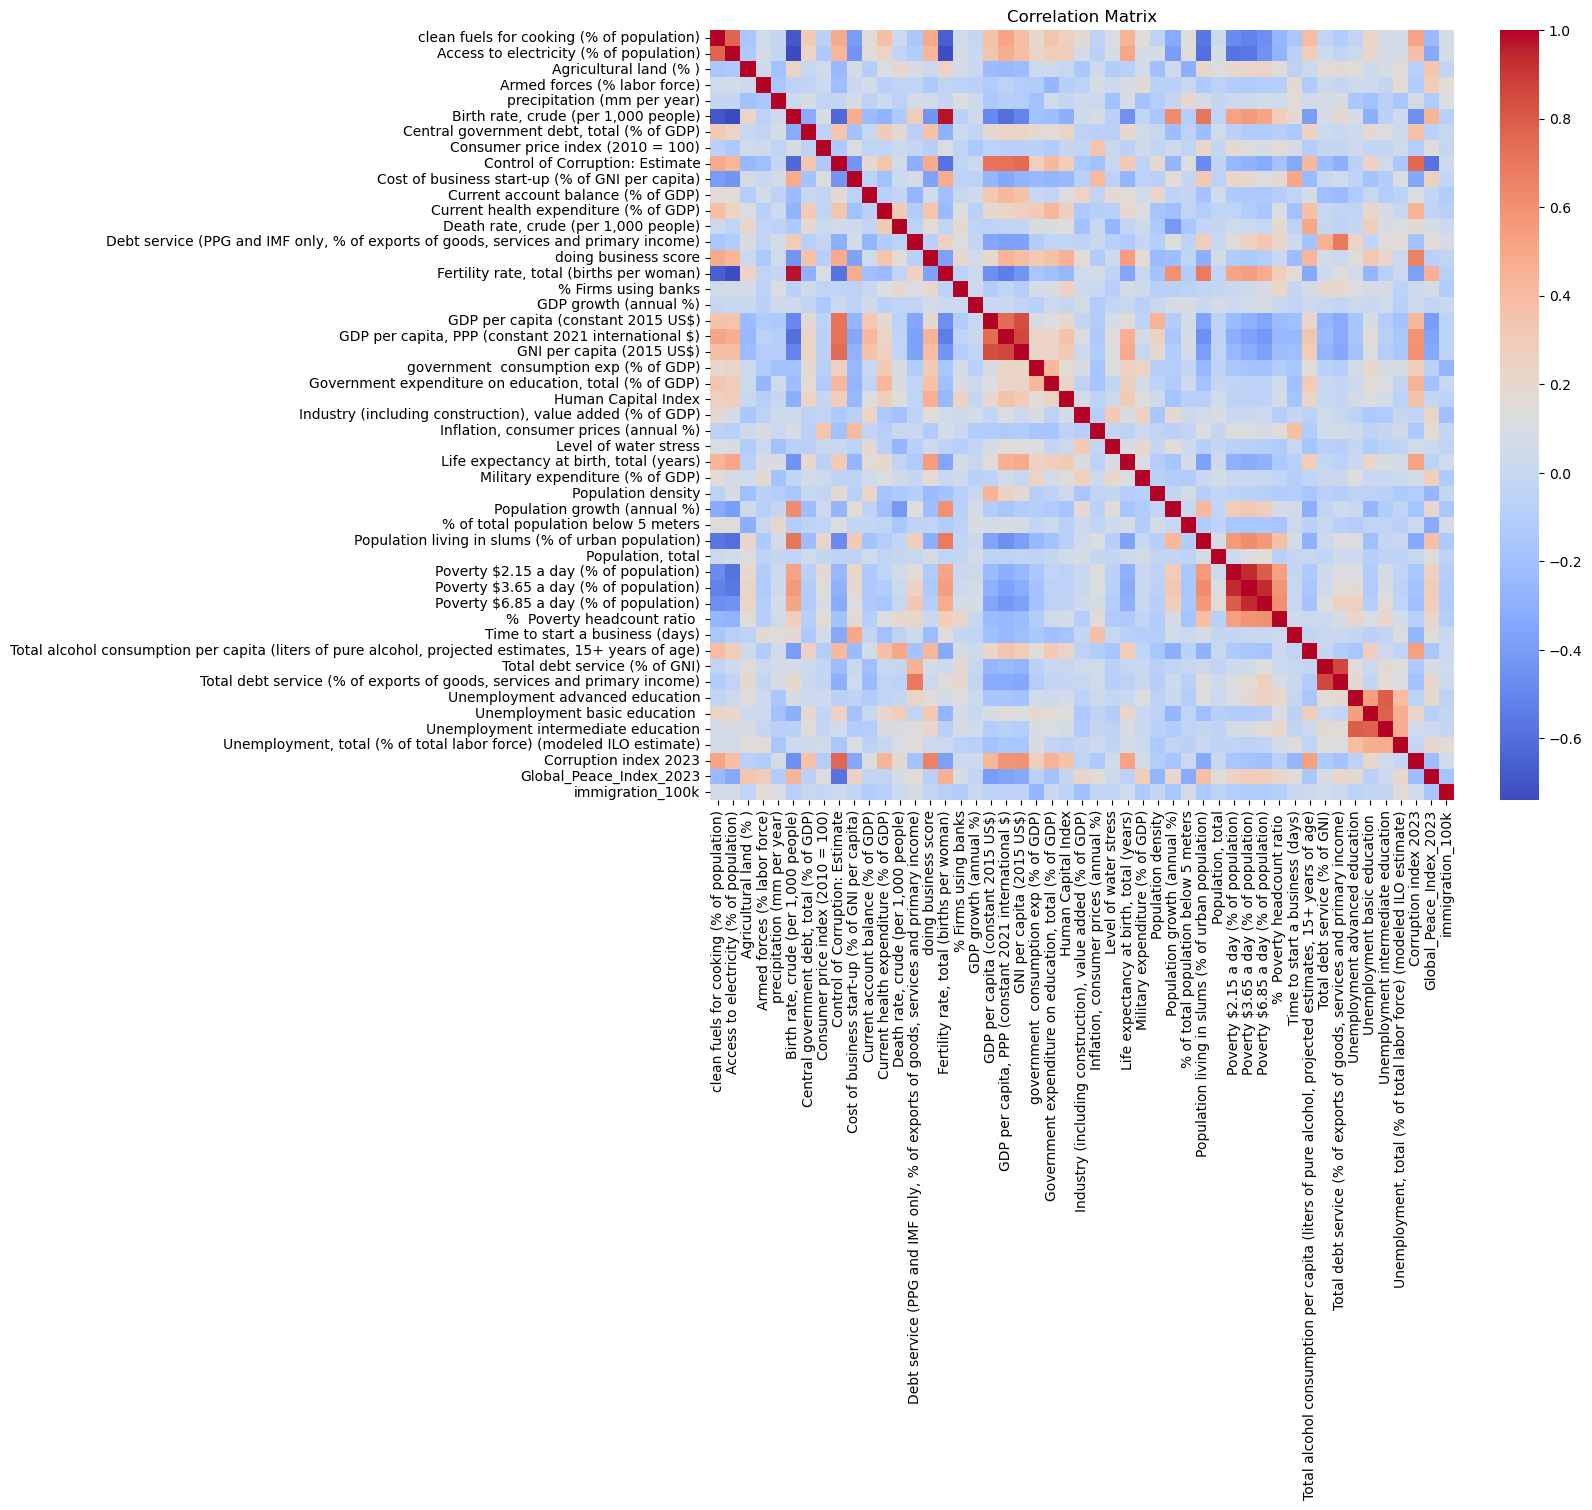

In [13]:
# Plot correlation matrix to assess relationships
plt.figure(figsize=(12,10))
corr_matrix = predictors_scaled_df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

### Define the target and predictors.

In [18]:
# Select features and target
target = 'immigration_100k'
X = predictors_scaled_df.drop(columns= [target])
y = predictors_scaled_df[target]

In [19]:
X.shape

(1663, 48)

In [20]:
y.shape

(1663,)

## Splitting the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(1330, 48)

In [23]:
X_test.shape

(333, 48)

## Regression Modelling

### --- Linear Regression ---

In [24]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 0.4938414355845198
Linear Regression R2: 0.43432875833993567


### --- Random Forest Regression ---

In [25]:
# --- Random Forest Regression ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2:", r2_rf)

Random Forest Regression MSE: 0.1300086487190681
Random Forest Regression R2: 0.8510814434588371


The results show that the Random Forest model significantly outperforms the Linear Regression model:

- Mean Squared Error (MSE):

  - Linear Regression: 582.96
  - Random Forest: 137.82
   A lower MSE indicates that the Random Forest model's predictions are, on average, much closer to the actual values.

- R² Score:

  - Linear Regression: 0.434 (approximately 43% of the variance explained)
  - Random Forest: 0.866 (approximately 87% of the variance explained)
   The higher R² score of the Random Forest model means it captures a significantly larger proportion of the variability in immigration_100k.
   
In summary, the Random Forest model is more accurate and reliable for predicting immigration per 100k, likely due to its ability to capture non-linear relationships and interactions among the predictors that a simple linear model might miss.

## Feature Importance & Key Variable Analysis

In [26]:
# Use Random Forest to gauge feature importance
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Unemployment, total (% of total labor force) (modeled ILO estimate)                                     0.386850
Armed forces (% labor force)                                                                            0.128414
government  consumption exp (% of GDP)                                                                  0.076225
Population, total                                                                                       0.069498
Population density                                                                                      0.040660
Fertility rate, total (births per woman)                                                                0.021599
Total debt service (% of GNI)                                                                           0.021576
Level of water stress                                                                                   0.019180
Debt service (PPG and IMF only, % of exports of goods, services and primar

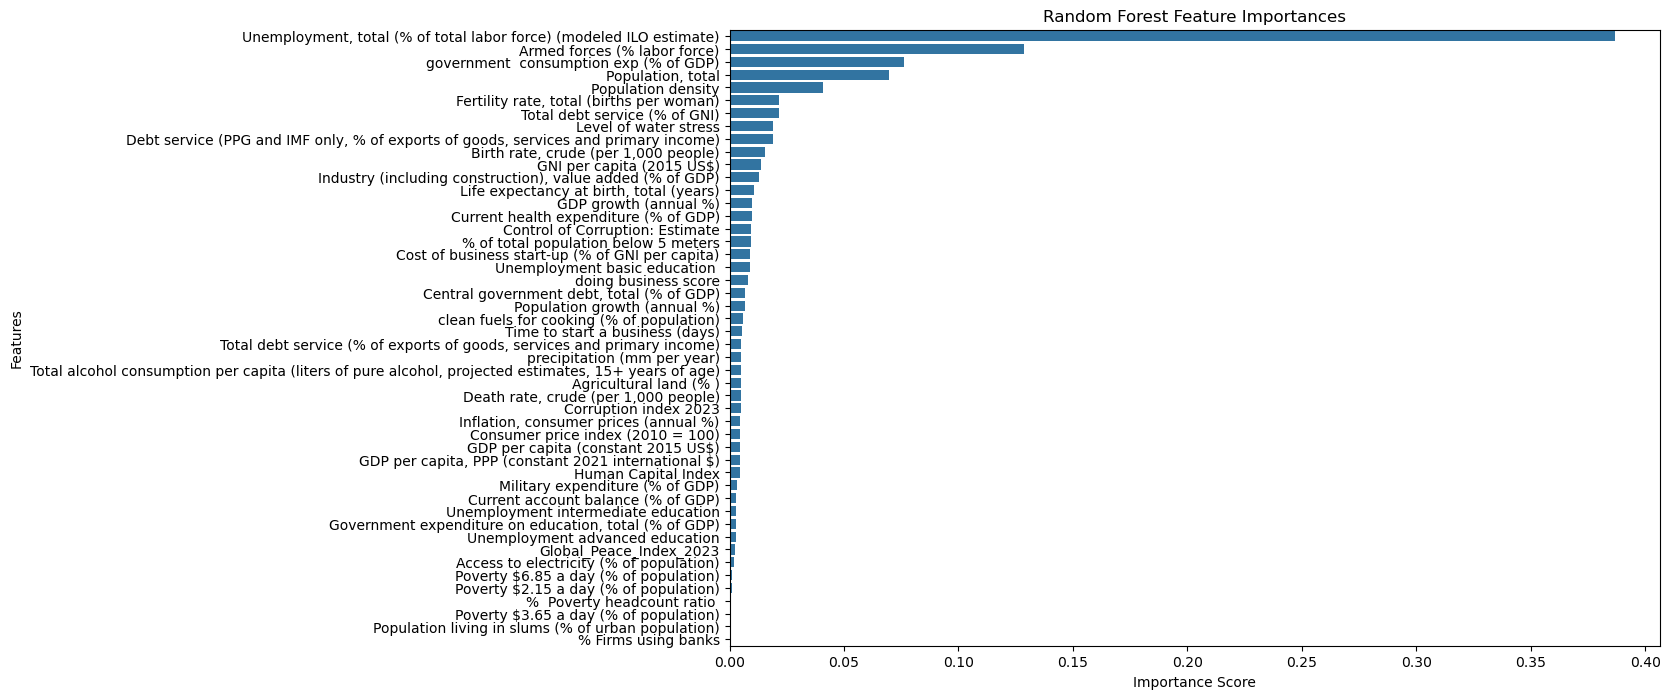

In [27]:
# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Actual vs Predicted Values

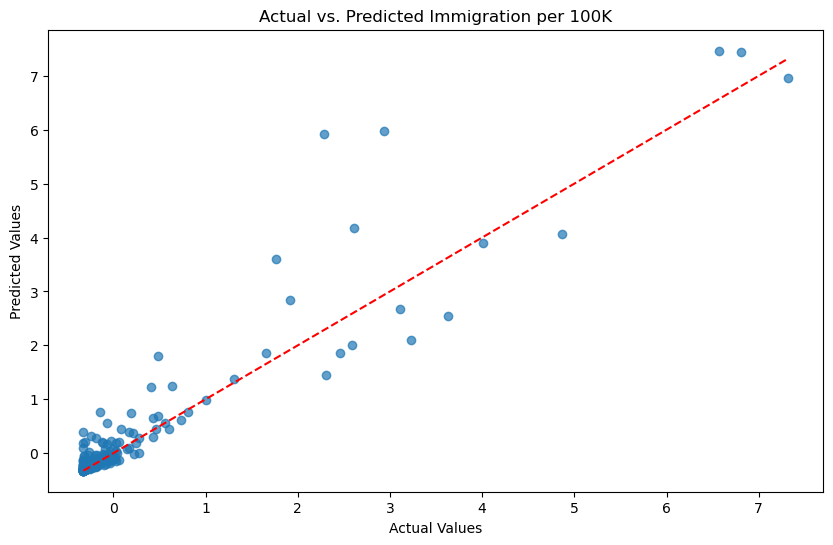

In [28]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.title('Actual vs. Predicted Immigration per 100K')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Using GridSearchCV to tune the RandomForestRegressor

In [29]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to perform 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search on the training data (assume X_train, y_train are defined)
grid_search.fit(X_train, y_train)

# Output the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the performance of the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print("Tuned Random Forest Regression MSE:", mse_best)
print("Tuned Random Forest Regression R2:", r2_best)

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Regression MSE: 0.11530362898322327
Tuned Random Forest Regression R2: 0.8679253252662952


Random Forest Regression MSE: 137.82418833268767 <br>
Random Forest Regression R2: 0.8662635470522743

## Using Feature selection

In [31]:
top_features = feature_importances.index[:5]
X_new5 = X[top_features]
X_new5.head()

,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Armed forces (% labor force),government consumption exp (% of GDP),"Population, total",Population density
0,0.340125,1.668181,-1.802169,-0.053525,-0.183054
1,0.527347,1.610880,-1.802169,-0.047709,-0.182412
2,0.709374,1.524272,-1.802169,-0.041094,-0.181681
3,0.711452,1.175262,-1.802169,-0.034038,-0.180901
4,0.709547,1.215508,-1.802169,-0.026587,-0.180077


In [32]:
X_new5.shape

(1663, 5)

## Splitting the data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_new5, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(1330, 5)

In [35]:
X_test.shape

(333, 5)

## Regression Modelling

### --- Linear Regression ---

In [36]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 0.7534317409484972
Linear Regression R2: 0.13698074382116499


In [37]:
# --- Random Forest Regression ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2:", r2_rf)

Random Forest Regression MSE: 0.13400571474166825
Random Forest Regression R2: 0.84650299957568


## Feature Importance & Key Variable Analysis

In [38]:
# Use Random Forest to gauge feature importance
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X_new.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Unemployment, total (% of total labor force) (modeled ILO estimate)    0.456972
Population, total                                                      0.169189
Armed forces (% labor force)                                           0.150562
Population density                                                     0.119429
government  consumption exp (% of GDP)                                 0.103848
dtype: float64


### Actual vs Predicted Values

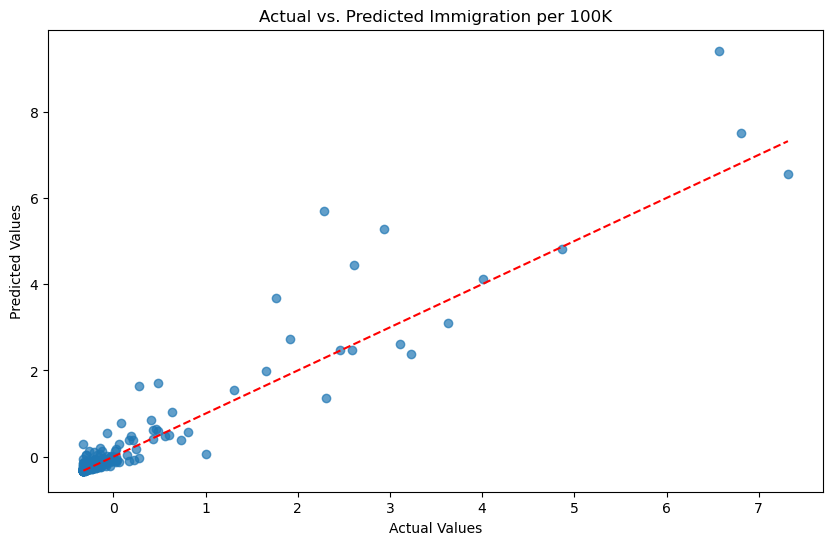

In [40]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.title('Actual vs. Predicted Immigration per 100K')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Using GridSearchCV to tune the RandomForestRegressor

In [41]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to perform 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search on the training data (assume X_train, y_train are defined)
grid_search.fit(X_train, y_train)

# Output the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the performance of the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print("Tuned Random Forest Regression MSE:", mse_best)
print("Tuned Random Forest Regression R2:", r2_best)

Best parameters found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Regression MSE: 0.1339209685835282
Tuned Random Forest Regression R2: 0.8466000721602116


Random Forest Regression MSE: 0.13400571474166825 <br>
Random Forest Regression R2: 0.84650299957568